# Data Scientist Challenge - LATAM Airlines
## Jesús Berríos
## Globant Data Scientist
---

Problema:

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL).

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino
---
Se importan las librerías a utilizar

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Leer dataset

In [2]:
df = pd.read_csv('./input/dataset_SCL.csv')
df

/Users/jesus.berrios/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
Se procede a explorar los datos.

#### Se exploran dtypes y existencias de datos nulos:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


##### Comentarios
* No hay existencia de datos nulos
* Algunos columnas presentan DType object, por lo que podrían contener strings

#### Cantidad de datos por Aerolínea y tipo de vuelo

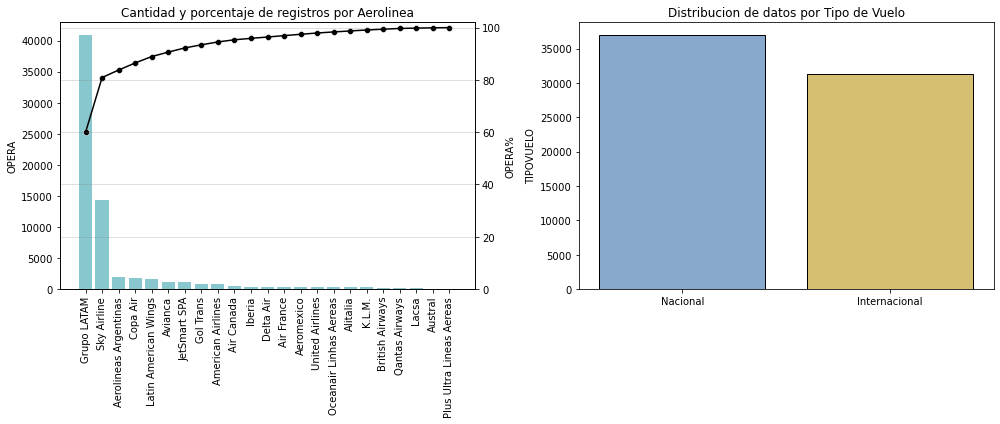

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad y porcentaje de registros por Aerolinea')
sns.barplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts(),ax=ax,color='#7DD1D8')
ax.tick_params(axis='x', labelrotation = 90)
ax2 = ax.twinx()
ax2.set_ylabel('OPERA%')
ax2.grid(color='grey',linestyle='-',alpha=0.3)
sns.lineplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
sns.scatterplot(x=df.OPERA.value_counts().index,y=df.OPERA.value_counts().cumsum()/df.OPERA.value_counts().sum()*100,ax=ax2,color='k')
ax2.set_ylim([0,102])


ax = axes[1]
ax.set_title('Distribucion de datos por Tipo de Vuelo')
sns.barplot(x=df.TIPOVUELO.value_counts().index.map({'I':'Internacional','N':'Nacional'}),y=df.TIPOVUELO.value_counts(),ax=ax,palette=['#7DA8D8','#E7C862'],edgecolor='k')
#ax.tick_params(axis='x', labelrotation = 90)

fig.tight_layout()

##### Comentarios
* La aerolínea de operación que presenta mayor cantidad de registros es LATAM, con alrededor de 40000 filas. Esta categoría compone alrededor el 60% del dataset.
* La aerolínea Sky, con casi 15000 registros concentra alrededor del 20% de los datos.
* La cantidad de datos por aerolínea restante compone el 20% del total, en el que ninguna representa más del 10% de la muestra.
* La distribución de datos por tipo de vuelo está relativamente balanceada, siendo la muestra de datos de vuelos nacionales ligeramente mayor con respecto a la cantidad de vuelos internacionales.

#### Cantidad de Vuelos Origen-Destino para Rutas Nacionales e Internacionales

In [7]:
dfsn = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='N'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False)
dfsn['vuel_p'] = dfsn.vuelos_qty/dfsn.vuelos_qty.sum()*100

# Generate data 
lab=dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()
position_list = [*range(0,len(dfsn.SIGLAORI.unique().tolist()+dfsn.SIGLADES.unique().tolist()))]
sou = [lab.index(x) for x in dfsn.SIGLAORI]
dest = [lab.index(x) for x in dfsn.SIGLADES]
color_n = [str(sns.color_palette('tab20').as_hex()[x]) for x in range(0,len(lab))]

#Plot Sankey for National
fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab,
      color = color_n
    ),
    link = dict(
      source = sou, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest,
      value = dfsn.vuelos_qty.values.tolist(),
      customdata = dfsn.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Nacionales)", font_size=10,width=500, height=700)
fig.show()

##### Comentarios:
* Todos los vuelos nacionales tienen como Origen la Ciudad de Santiago
* Las ciudades con mayor cantidad de vuelos son Antofagasta, con 5786 vuelos (15.65% de los vuelos nacionales); y Calama con 5146 vuelos (13.92% de los vuelos nacionales)

In [8]:
dfsi = df[['SIGLAORI','SIGLADES','Fecha-I']][df.TIPOVUELO=='I'].groupby(['SIGLAORI','SIGLADES'])[['Fecha-I']].count().reset_index().rename(columns={'Fecha-I':'vuelos_qty'}).sort_values('vuelos_qty',ascending=False).reset_index(drop=True)
dfsi['vuel_p'] = dfsi.vuelos_qty/dfsi.vuelos_qty.sum()*100

lab_i=dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()
position_list_i = [*range(0,len(dfsi.SIGLAORI.unique().tolist()+dfsi.SIGLADES.unique().tolist()))]
sou_i = [lab_i.index(x) for x in dfsi.SIGLAORI]
dest_i = [lab_i.index(x) for x in dfsi.SIGLADES]
pal_i = sns.color_palette('tab20').as_hex()*4
color_i = [str(pal_i[x]) for x in range(0,len(lab_i))]

fig = go.Figure(data=[go.Sankey(
  valueformat = ".0f",
  valuesuffix = " vuelos",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab_i,
      color = color_i
    ),
    link = dict(
      source = sou_i, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = dest_i,
      value = dfsi.vuelos_qty.values.tolist(),
      customdata = dfsi.vuel_p.values.tolist(),
      hovertemplate="%{customdata:.2f} %"
  ))])

fig.update_layout(title_text="Cantidad de Vuelos Origen-Destino (Rutas Internacionales)", font_size=10,width=500, height=900)
fig.show()

##### Comentarios
* Todos los vuelos internacionales tienen como Origen la Ciudad de Santiago
* Los 10 principales destinos internacionales se encuentran en el continente Americano. El destino intercontinental con más vuelos es Madrid, con 894 vuelos (2.86% de la muestra).
* Las tres principales rutas internacionales son Santiago-Buenos Aires (6335 vuelos, 20.28%), Santiago-Lima (5270 vuelos, 16.87%) y Santiago-Sao Paulo (3569 vuelos, 11.42%).

#### Cantidad de vuelos de acuerdo a temporalidad de operación de vuelo

In [9]:
df['hora_o'] = df['Fecha-O'].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')))

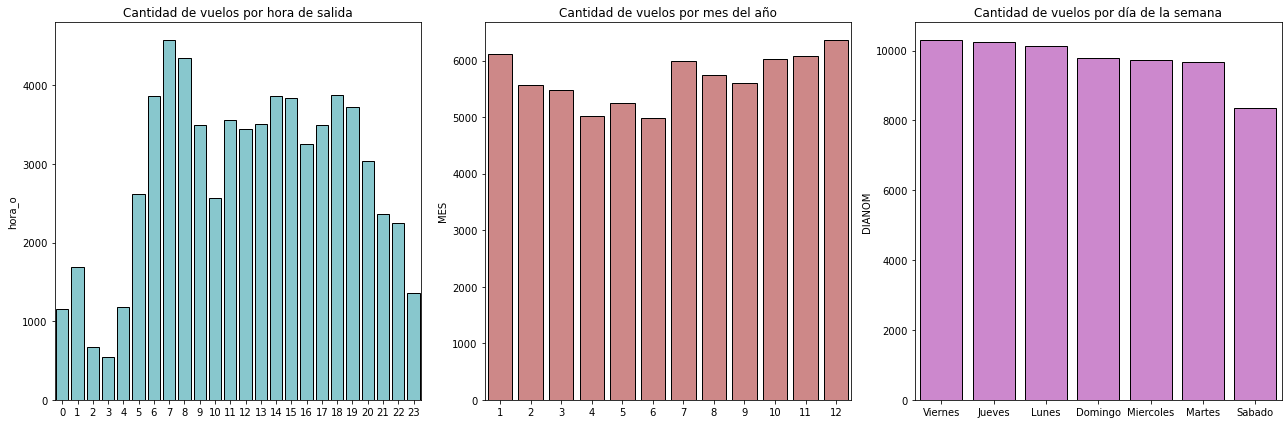

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axes = axes.flatten()

ax = axes[0]
ax.set_title('Cantidad de vuelos por hora de salida')
sns.barplot(x=df.hora_o.value_counts().sort_index().index,y=df.hora_o.value_counts().sort_index(),ax=ax,color='#7DD1D8',edgecolor='k')
#sns.distplot(df.hora_o,bins=24,hist_kws=dict(edgecolor="black"),ax=ax)

ax = axes[1]
ax.set_title('Cantidad de vuelos por mes del año')
sns.barplot(x=df.MES.value_counts().index,y=df.MES.value_counts(),ax=ax,color='#D87D7D',edgecolor='k')
#ax.tick_params(axis='x', labelrotation = 90)

ax = axes[2]
ax.set_title('Cantidad de vuelos por día de la semana')
sns.barplot(x=df.DIANOM.value_counts().index,y=df.DIANOM.value_counts(),ax=ax,color='#D77DD8',edgecolor='k')

fig.tight_layout()

##### Comentarios
* Se observa gran concentración de vuelos entre las 6-9am, 2-4pm y 6-8pm; mientras que el horario con menos vuelos es 2-4am.
* Los meses con mayor cantidad de vuelos son Diciembre y Enero, y se puede decir que la temporada más baja está desde Abril hasta inicios de Julio.
* El día más concurrido es el Viernes, mientras que el Sábado es el que posee menor cantidad de vuelos.

#### Existen varias columnas que muestran datos programados y pueden compararse con los datos de operación

In [11]:
print('Comparaciones Datos de Vuelos Programados vs. Operación')

for i,j in zip(['Vlo','Ori','Des','Emp'],['Número de Vuelo','Código Ciudad Origen','Código Ciudad Destino','Código Aerolínea']):
    print(j)
    comparison_io = df[i+'-I']==df[i+'-O']
    print(comparison_io.value_counts(normalize=True)*100)
    print('')

Comparaciones Datos de Vuelos Programados vs. Operación
Número de Vuelo
True     97.287629
False     2.712371
dtype: float64

Código Ciudad Origen
True    100.0
dtype: float64

Código Ciudad Destino
True     99.958948
False     0.041052
dtype: float64

Código Aerolínea
True     72.628508
False    27.371492
dtype: float64



In [12]:
df[df['Emp-I']!=df['Emp-O']][['Emp-I','Emp-O','OPERA','SIGLAORI']]\
    .groupby(['Emp-I','Emp-O','OPERA'])[['SIGLAORI']].count().reset_index().rename(columns={'SIGLAORI':'cnt'})\
        .sort_values('cnt',ascending=False).reset_index(drop=True)

,Emp-I,Emp-O,OPERA,cnt
0,LAN,LXP,Grupo LATAM,14549
1,LAW,JMR,Latin American Wings,1547
2,LAN,LPE,Grupo LATAM,1210
3,LAN,DSM,Grupo LATAM,491
4,LAN,LNE,Grupo LATAM,373
5,AVA,LRC,Avianca,265
6,QFU,QFA,Qantas Airways,195
7,LAW,56R,Latin American Wings,17
8,LAW,48O,Latin American Wings,10
9,ARG,AUT,Aerolineas Argentinas,5


##### Comentarios
* En los datos programados vs. operación se pueden observar pequeñas inconsistencias de datos para el número de vuelo y el código de ciudad destino. De esto se puede asumir que por alguna circunstancia el número de vuelo puede variar, o que pueden existir escenarios que puedan cambiar el destino del vuelo de acuerdo al planeado (por ejemplo, condiciones climatológicas).
* Los datos de código ciudad origen programado vs. operación son 100% consistentes.
* Con respecto a los datos del código de aerolínea programado respecto al de operación se tiene una inconsistencia para el 27.37% de los registros. Se puede observar que la mayoría de estos registros se presentan para Grupo Latam, cuya operación es reemplazada por LXP (Latam Express). Aun así, hay gran cantidad de registros (miles), que sustituyen a la operación planificada de Latam.

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
* atraso_15 : 1 si dif_min > 15, 0 si no.
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

#### Se generan columnas con features requeridos